In [1]:
    import os
    # https://pypi.org/project/opencv-python/
    # pip install opencv-python
    import cv2
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    from random import randint
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import Perceptron

In [5]:
    PATH = r'C:/PythonScripts/course-files2/shapes/'
    IMG_SIZE = 64
    shapes = ["circle", "square", "triangle", "star"]
    labels = []
    dataset = []

In [6]:
for shape in shapes:
    print("Getting data for: ", shape)
    #iterate through each file in the folder
    for path in os.listdir(PATH + shape):
        #add the image to the list of images
        image = cv2.imread(PATH + shape + '/' + path)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        image = image.reshape(12288) #64x64x3 - rozmiar i rgb
        dataset.append(image)
        labels.append(shapes.index(shape))

Getting data for:  circle
Getting data for:  square
Getting data for:  triangle
Getting data for:  star


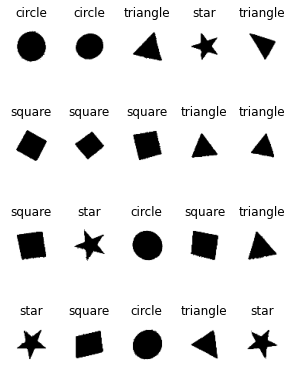

In [7]:
    index = np.random.randint(0, len(dataset) - 1, size= 20)
    plt.figure(figsize=(5,7))
     
    for i, ind in enumerate(index, 1):
        img = dataset[ind].reshape((64, 64, 3))
        lab = shapes[labels[ind]]
        plt.subplot(4, 5, i)
        plt.title(lab)
        plt.axis('off')
        plt.imshow(img)

In [9]:
    X = np.array(dataset)
    X.shape     

(14970, 12288)

In [10]:
    y=np.array(labels)
    y.shape

(14970,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
perceptron = Perceptron(max_iter=100, shuffle=True)
perceptron.fit(X_train, y_train)
perceptron.score(X_test, y_test)

0.9983299933199733

In [22]:
    y_pred = perceptron.predict(X_test)
    len(y_pred)

2994

In [15]:
    bad_results = [(a,b,c) for (a,b,c) in zip(X_test[y_test != y_pred], 
                                              y_test[y_test != y_pred],
                                              y_pred[y_test != y_pred] )]
    len(bad_results)

5

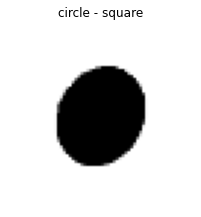

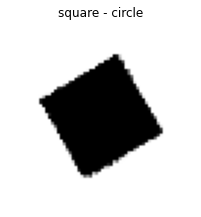

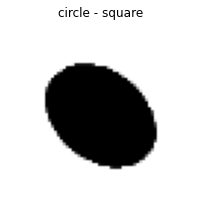

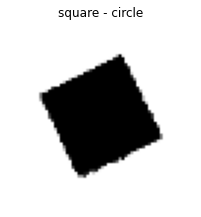

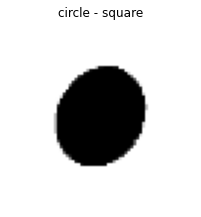

In [16]:
    i=1
    for x_test, y_test, y_pred in bad_results:
        img = x_test.reshape((64, 64, 3))
        label_test = shapes[y_test]
        label_pred = shapes[y_pred]
        plt.figure(figsize=(20,20))
        plt.subplot(len(bad_results), 1, i)
        plt.title(label_test +' - '+ label_pred)
        plt.axis('off')
        plt.imshow(img)
        i+=1

In [21]:
    idx = np.random.randint(0,y_pred.size)
    idx

2873

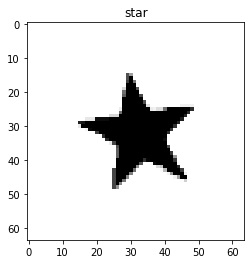

In [23]:
    plt.figure()
    plt.title(shapes[y_pred[idx]])
    plt.imshow(X_test[idx].reshape((64,64,3)))